In [6]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import json
import numpy as np
import TwitterApiHandler
import re

In [7]:
bot = TwitterApiHandler.Twitter('c16icxmBoqqhpZAMFZxlWNxYo',
                                'cW4Y6PbYfDVe15b6yeTQjWC9Og0kTOgpQt3caIEeLreasIRNeE',
                                '967018015849148417-21nDpxdrdkAubl7NxFOZguy8Wr7o0Dd',
                                'bfvCreJfsFb8ZjSjPViEGS9KSW13gWlYt4tRZYhg9OMij', 'TweetDB')

bot.stream('Bitcoin')

In [8]:
def cleanTweets(tweet):
    return re.sub('''https?:?\/?\/?(www\.)?[a-zA-Z0-9@:%._\+~#=]*\/[a-zA-Z0-9@:%._\+~#=]*|(RT @[a-zA-Z0-9:_]*)|(Telegram group:)|[^a-zA-Z0-9#?@&!=_:;,’$.…'"\s]+''', "", tweet)

In [9]:
listOfCleanedTweets = []
with open ('tweetDB.txt', 'r') as file:
    for line in file.readlines():
        line = cleanTweets(line)
        listOfCleanedTweets.append(line)

In [15]:
listOfPolarity = []
for line in listOfCleanedTweets:
    listOfPolarity.append(TextBlob(line).sentiment.polarity if TextBlob(line).sentiment.polarity != 0 else None)
listOfPolarity = list(set(listOfPolarity))

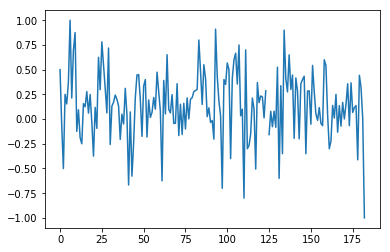

In [16]:
plt.plot(listOfPolarity)